# Exploration of the RWJF data

This exploration seeks to understand current levels of geographical, temporal, topical coverage


## Functions etc

In [625]:
import random

In [626]:
def flatten_list(lol): 
    '''
    Flatten a list
    
    '''
    return([x for el in lol for x in el])

#Get sample

def sample_obs(data,field,sample_size,text_length):
    '''
    Samples observations from a dataset for sense-checking
    
    '''
    
    rel = list(data[field])
    
    out = random.sample(rel,sample_size)
    
    for s in out:
        print('====')
        print(s[:text_length])
        print('\n')


## Load data

In [627]:
data = pd.read_csv('../data/external/all_data.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,7,8,9,10,12,15,17,18,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [628]:
data.shape

(7139561, 26)

In [629]:
data.columns = [re.sub(' ','_',x.lower()) for x in data.columns]

In [630]:
data.source_id.value_counts()

GitHub        5871898
Crunchbase     662238
GDB            357494
arxiv          247931
Name: source_id, dtype: int64

In [631]:
data.gdb_dataset_id.value_counts().sum()

357494

We have 357,000 observations outside of GitHUb, CrunchBase and arXIV

In [632]:
data.gdb_dataset_id.value_counts()

rgov              154318
gtr                79427
H2020              63125
innovateuk         31987
world_reporter     15089
rwjf                7227
ahrq                6321
Name: gdb_dataset_id, dtype: int64

## Focus on shared fields

In the case of funding, do we have data for the funders?

In [633]:
data.columns

Index(['unnamed:_0', 'cb_category_group_list', 'cb_category_list',
       'cb_number_of_employees', 'cb_role', 'currency', 'description',
       'end_date', 'funding', 'gdb_dataset_id', 'gh_user_creation_date',
       'gh_user_id', 'gh_user_type', 'gh_valid_description', 'name', 'row_id',
       'source_id', 'start_date', 'status', 'unnamed:_0.1',
       'administrative_area_level_1', 'administrative_area_level_2',
       'arxiv_categories', 'country', 'lat', 'lng'],
      dtype='object')

In [634]:
shared_columns = ['name','description','source_id','gdb_dataset_id','currency','funding','start_date','country']

In [635]:
data_sh = data[shared_columns]

In [636]:
data_sh.head()

,name,description,source_id,gdb_dataset_id,currency,funding,start_date,country
0,University College London,"Over the last fifty years, accelerators of eve...",GDB,gtr,GBP,26776,2012-10-01 00:00:00,United Kingdom
1,University College London,Abstracts are not currently available in GtR f...,GDB,gtr,GBP,187427,2002-02-01 00:00:00,United Kingdom
2,University College London,The question of how the human brain develops o...,GDB,gtr,GBP,3.00761e+06,1998-10-01 00:00:00,United Kingdom
3,University College London,T-cells are white blood cells that enable us t...,GDB,gtr,GBP,465999,2012-06-30 00:00:00,United Kingdom
4,University College London,"When excavators dug al-Bahnasa, some 200 km so...",GDB,gtr,GBP,851035,2010-09-01 00:00:00,United Kingdom


In [637]:
#Create a detailed source field
data_sh['source_det']  = [x if x!='GDB' else y for x,y in zip(data_sh.source_id,data_sh.gdb_dataset_id)]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [638]:
data_sh.source_det.value_counts()

GitHub            5871898
Crunchbase         662238
arxiv              247931
rgov               154318
gtr                 79427
H2020               63125
innovateuk          31987
world_reporter      15089
rwjf                 7227
ahrq                 6321
Name: source_det, dtype: int64

## Missing values

In [639]:
data_sh.groupby('source_det').apply(lambda x: 100*x.isna().mean())

,name,description,source_id,gdb_dataset_id,currency,funding,start_date,country,source_det
source_det,,,,,,,,,
Crunchbase,0.000453,0.004379,0.0,100.0,0.0,86.763822,31.406383,100.000000,0.0
GitHub,0.000153,0.000000,0.0,100.0,100.0,100.000000,0.000000,100.000000,0.0
H2020,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.004752,0.261386,0.0
ahrq,0.506249,0.000000,0.0,0.0,0.0,0.000000,0.601171,0.506249,0.0
arxiv,0.000000,0.000000,0.0,100.0,100.0,100.000000,0.000000,100.000000,0.0
gtr,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
innovateuk,0.000000,0.000000,0.0,0.0,0.0,5.177103,5.177103,0.550224,0.0
rgov,2.268692,0.000000,0.0,0.0,0.0,15.903524,0.000000,2.339973,0.0
rwjf,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,7.748720,0.0


We have missing data for some of the non-grant databases. I assume that this is because they haven't been geocoded yet

And obviously, some of the data lack information about funding etc.

### Check country distributions by location

In [640]:
country_data = data_sh.groupby('gdb_dataset_id')[
    'country'].apply(lambda x: x.value_counts(normalize=True).sort_values(ascending=False)[:20]).reset_index(drop=False)

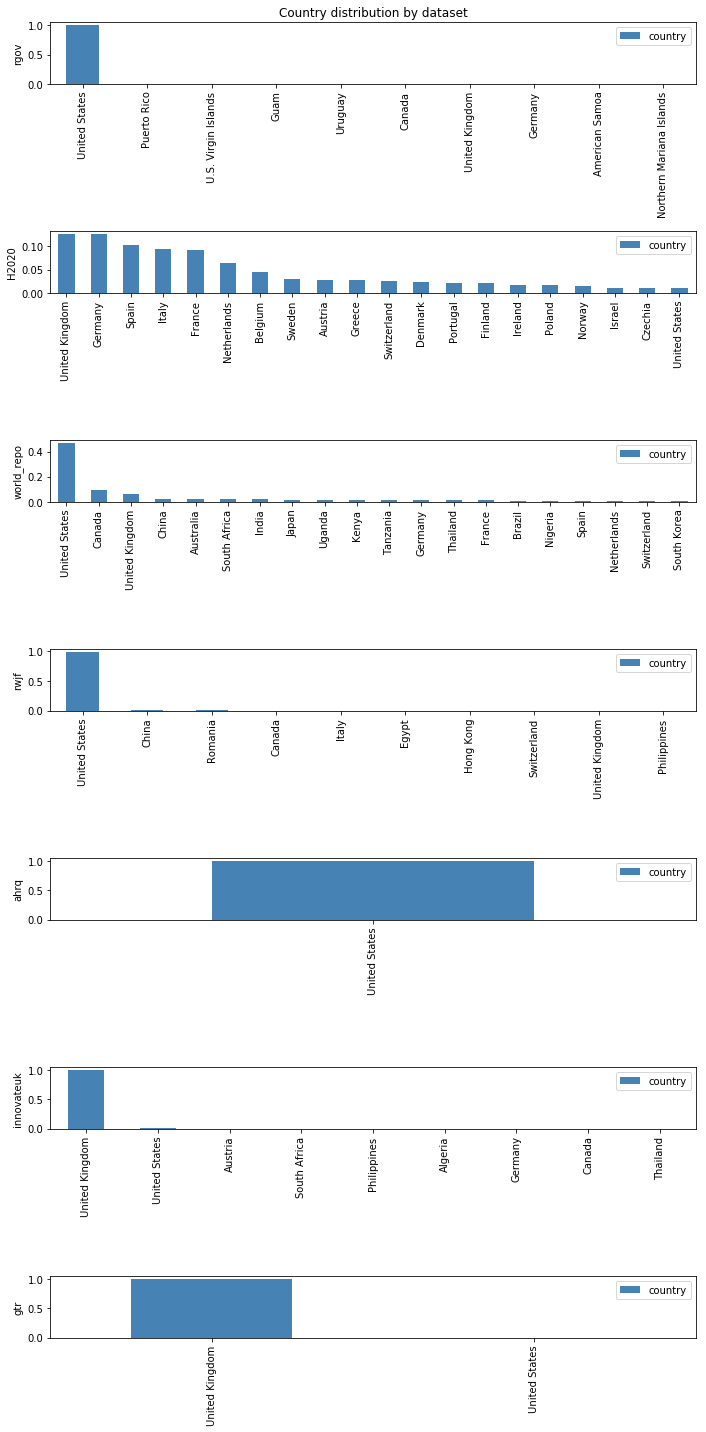

In [641]:
fig,ax = plt.subplots(figsize=(10,20),nrows=len(set(country_data.gdb_dataset_id)))


for num,source in enumerate(set(country_data.gdb_dataset_id)):
    
    rel_data = country_data.loc[country_data.gdb_dataset_id==source]
    
    rel_data.plot.bar(color='steelblue',ax=ax[num])
    ax[num].set_xticklabels(rel_data['level_1'])
    ax[num].set_ylabel(source[:10])
    
ax[0].set_title('Country distribution by dataset')
plt.tight_layout()
    

Our current coverage (excluding, in this case, GitHub and CrunchBase) is very dominated by the USA. We need to consider strategies to address this.

**Question:** Does the nationality data refer to the organisation doing the project or the country receiving the intervention?

In [642]:
#Get them very lazily using a list of countries I got from here: http://www.fao.org/countryprofiles/iso3list/en/

In [643]:
from bs4 import BeautifulSoup

lazy_country_names = BeautifulSoup(requests.get('http://www.fao.org/countryprofiles/iso3list/en/').text)


/usr/local/lib/python3.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/local/Cellar/python/3.7.0/Frameworks/Python.framework/Versions/3.7/lib/python3.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [644]:
countries = [x.get_text().strip().lower() for x in lazy_country_names.find_all('td',class_='shortname')]

In [645]:
#Let's check on a dataset without GitHub and only descriptions

data_no_gh_descr = data_sh[data_sh.source_id!='GitHub'].dropna(axis=0,subset=['description'])

In [646]:
data_no_gh_descr['countries_in_descr'] = [[x for x in countries if x in text.lower()] for text in data_no_gh_descr['description']]

In [647]:
# How many descriptions mention a country?

sum([len(x)>0 for x in data_no_gh_descr.countries_in_descr])

116784

In [648]:
country_freqs = pd.Series(Counter(flatten_list(data_no_gh_descr['countries_in_descr']))).sort_values(ascending=False)

country_freqs.head(n=20)

mali              23905
india             14020
china              7511
australia          6063
japan              5429
canada             5215
germany            4645
france             4440
oman               4302
mexico             3672
brazil             3491
italy              3416
cuba               3393
spain              3310
georgia            2513
south africa       2137
united kingdom     2124
ireland            1991
netherlands        1894
singapore          1742
dtype: int64

In [649]:
#Let's have a look focusing on the world reporter data

sample_obs(data_no_gh_descr.loc[([len(x)>0 for x in data_no_gh_descr.countries_in_descr]) & (data_no_gh_descr.source_det=='world_reporter')],'description',5,800)

====

Project Summary
The focus of this revised renewal application remains centered around the natural history of SIVcpz infection
in wild chimpanzees. In the previous budget period, we developed non-invasive (fecal and urine based)
SIVcpz detection methods and used these to characterize the molecular epidemiology of SIVcpz in wild-living
ape populations throughout equatorial Africa (Nature 2004; Science 2006). We also traced the origin of
pandemic and non-pandemic HIV-1 to distinct chimpanzee communities in southern Cameroon (Science
2006), discovered HIV-1 group O-like viruses in wild gorillas (Nature 2006), and found that SIVcpz (like HIV-1)
has lost an important function of its Nef protein (Cell 2006; PLoS Pathogens 2008). These and other findings
are summarized in 29 publications (includi


====

 
The epidemiology of HIV in the Asia-Pacific region reflects local drivers of infection (e.g., male-to-male sex, injection drug use), key co-infections that impact treatment outcomes (e

In [650]:
#Let's have a look focusing on the world reporter data

sample_obs(data_no_gh_descr.loc[([len(x)>0 for x in data_no_gh_descr.countries_in_descr]) & (data_no_gh_descr.source_det=='rgov')],'description',5,800)

====
The Amazon basin contains nearly one million square kilometers of wetlands, predominantly peatlands, which are known to be highly productive and to store significant quantities of carbon in plant biomass and soil. Peatlands are characterized by soils rich in organic matter that are often saturated with water, and are therefore often low in oxygen. These conditions often lead to the release of methane, a greenhouse gas with ~25 times the heat-trapping capacity of carbon dioxide, and peatlands are known to be important global sources of methane. Until very recently, peatlands were not expected to be a significant component of the Amazon basin since these wetlands are more common in cold, northern latitudes and there were few records of their existence in the Amazon. In recent years, however,


====
1123536<br/>Stewart<br/><br/>This Pan-American Advanced Studies Institutes (PASI) award, jointly supported by the NSF and the Department of Energy (DOE), will take place during January, 2

We are identifying some projects with beneficiaries in the countries being mentioned

### Check type of content by source

Token frequencies by data source.

Lets use Spacy.



In [651]:
from nltk.corpus import stopwords
from collections import Counter


In [652]:
from string import punctuation

#Drop stopwords and punctuation
sws = stopwords.words('english') + [x for x in punctuation]


In [653]:
def freq_distr(corpus,length=500):
    '''
    corpus
    '''
    
    tok = corpus.apply(lambda x: x.lower().split(' '))
    
    return (pd.Series([x for el in tok for x in el if x not in eng]).value_counts(normalize=True).sort_values(ascending=False)[:length])


    

In [654]:
%%time
top_toks = data_no_gh_descr.groupby('source_det')['description'].apply(lambda x: freq_distr(x))


CPU times: user 7min 6s, sys: 12.3 s, total: 7min 18s
Wall time: 8min 42s


In [655]:
top_toks_2 = top_toks.reset_index(drop=False)


for x in set(top_toks_2.source_det):
    print(x)
    print('====')
    
    print(', '.join([x for x in top_toks_2.loc[top_toks_2.source_det==x,'level_1']][:30]))
    print('\n')


rgov
====
, research, project, new, students, data, also, understanding, provide, science, study, development, work, use, high, using, program, develop, used, graduate, university, undergraduate, proposed, systems, important, well, materials, two, including, one


H2020
====
project, research, new, european, , data, energy, development, develop, innovation, based, use, innovative, provide, support, technology, system, also, high, systems, different, management, well, eu, key, market, technologies, network, knowledge, services


world_reporter
====
, research, health, clinical, new, hiv, data, study, patients, development, studies, aim, treatment, (provided, applicant):, specific, use, cell, cancer, using, also, provide, project, develop, training, disease, risk, program, cells, human


arxiv
====
show, data, problem, using, algorithm, based, model, results, also, paper, two, number, network, new, proposed, method, approach, one, used, propose, information, present, performance, time, s

The vocabulary reflect sources: some of them are much more focused on health, others are generalist

### Temporal coverage

In [658]:
data_sh.groupby('source_det')['start_date'].apply(lambda x: list(x)[0:3])

source_det
Crunchbase                            [nan, 1968-07-18, 1968-01-01]
GitHub            [2017-08-27 17:03:00 UTC, 2017-03-03 20:52:23 ...
H2020                          [2016-03-01, 2017-05-01, 2017-04-01]
ahrq                                 [09/30/05, 09/30/13, 09/30/13]
arxiv                 [1241136000000, 1241136000000, 1044057600000]
gtr               [2012-10-01 00:00:00, 2002-02-01 00:00:00, 199...
innovateuk          [2017-08-01 00:00:00, 2017-10-01 00:00:00, nan]
rgov                  [="09/01/2017", ="09/01/2011", ="08/15/2010"]
rwjf                               [3/25/2009, 3/8/2010, 3/18/2011]
world_reporter                                      [nan, nan, nan]
Name: start_date, dtype: object

Dates are a mess

## Preliminary conclusions

* Our coverage is very focused on developed countries (for which we have founding) although we also detect activity in other countries through the abstract descriptions
* We mostly cover grants. Coverage of private-sector/applied/under-the-radar activity is much weaker
* The data include a mix of sources with health-specific data (AHRQ, RWJF, world-reporter) and generic research sources

## Next steps:

* Identify and collect data from other types of sources: crowdfunding, meetup activity, social innovation directories etc.
* Identify a strategy for research papers





# A look at crowdfunding

Kickstarter data here: https://webrobots.io/kickstarter-datasets/

Indiegogo data here: https://webrobots.io/indiegogo-dataset/

Remember the data checklist:

**What**

* Number of observations
* Definition of entities
* Missing data
* Activities of relevance for project

**Where**

* Geographical unit of analysis
* Geographical distribution

**When**

* Time coverage and trends




In [471]:
with open('../data/external/crowdfunding/Kickstarter_2018-10-18T03_20_48_880Z.json','r') as infile:
    k_json = [json.loads(line) for line in infile]

In [485]:
kdata = [obs['data'] for obs in k_json]

In [488]:
kdf = pd.DataFrame(kdata)

In [489]:
kdf.head()

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,1,Jozii is the premier service for full-time uni...,"{'id': 342, 'name': 'Web', 'slug': 'technology...",50,US,1413476386,"{'id': 69089661, 'name': 'AJ Smith and Brandon...",USD,$,True,...,jozii-college-jobs-made-easy,https://www.kickstarter.com/discover/categorie...,False,False,failed,1417150742,1.000000,{'web': {'project': 'https://www.kickstarter.c...,50.0,international
1,63,Dropsy is an adventure game with a focus on ex...,"{'id': 35, 'name': 'Video Games', 'slug': 'gam...",1613,US,1317217452,"{'id': 918042514, 'name': 'Jay Tholen', 'slug'...",USD,$,True,...,dropsy-a-different-take-on-the-old-school-adve...,https://www.kickstarter.com/discover/categorie...,True,True,successful,1320259153,1.000000,{'web': {'project': 'https://www.kickstarter.c...,1613.47,international
2,113,We've bought a press and already found a studi...,"{'id': 349, 'name': 'Letterpress', 'slug': 'pu...",6633,US,1403324529,"{'id': 1551377593, 'name': 'Camila and Daniela...",USD,$,True,...,letra-chueca-crooked-letter-a-printshop-and-bi...,https://www.kickstarter.com/discover/categorie...,True,False,successful,1410502338,1.000000,{'web': {'project': 'https://www.kickstarter.c...,6633.0,international
3,1,"Premium, fashion sneaker brand intertwining hi...","{'id': 266, 'name': 'Footwear', 'slug': 'fashi...",1,GB,1457103832,"{'id': 1361409471, 'name': 'Ross Buckley', 'is...",GBP,£,False,...,high-end-premium-handmade-sneakers,https://www.kickstarter.com/discover/categorie...,False,False,failed,1462305856,1.407899,{'web': {'project': 'https://www.kickstarter.c...,1.40789944,international
4,99,Made in Europe from the finest quality leather...,"{'id': 266, 'name': 'Footwear', 'slug': 'fashi...",20654,CA,1423776567,"{'id': 456810610, 'name': 'Luigi Sardo', 'slug...",CAD,$,True,...,the-domenico-sneakerboot-by-luigi-sardo,https://www.kickstarter.com/discover/categorie...,True,False,successful,1429678899,0.782122,{'web': {'project': 'https://www.kickstarter.c...,19817.40571572,international


In [490]:
kdf.shape

(205696, 37)

There are around 205,000 projects

#### What is an entity here?

In [494]:
kdf.loc[0]

backers_count                                                               1
blurb                       Jozii is the premier service for full-time uni...
category                    {'id': 342, 'name': 'Web', 'slug': 'technology...
converted_pledged_amount                                                   50
country                                                                    US
created_at                                                         1413476386
creator                     {'id': 69089661, 'name': 'AJ Smith and Brandon...
currency                                                                  USD
currency_symbol                                                             $
currency_trailing_code                                                   True
current_currency                                                          USD
deadline                                                           1417150740
disable_communication                                           

An entity is a project. 

In [495]:
kdf['state'].value_counts()

successful    114158
failed         74951
canceled        8532
live            7438
suspended        617
Name: state, dtype: int64

This seems to include all projects in Kickstarter ever

In [496]:
kdf.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

Some variables we will work with shortly:

* Category / blurb (to find activities related to health)
* Country / location (to analyse geography)
* launched at / created at // deadline / status (to measure trends and geography)

### Missing values

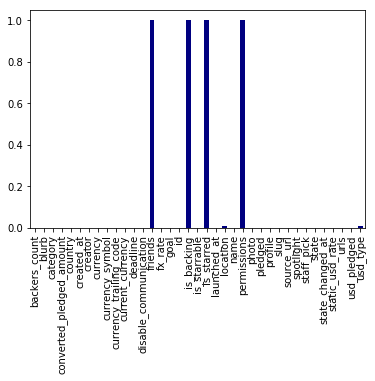

In [500]:
kdf.apply(lambda x: x.isna().mean(),axis=0).plot.bar(color='navy')

Few missing data

### Activities of relevance to the project.

In this case it would be projects that are about health or mention health

#### Check categories 

In [503]:
kdf['category'][0]

{'id': 342,
 'name': 'Web',
 'slug': 'technology/web',
 'position': 15,
 'parent_id': 16,
 'color': 6526716,
 'urls': {'web': {'discover': 'http://www.kickstarter.com/discover/categories/technology/web'}}}

We need to extract the categories from this field

In [504]:
kdf['category_value']=[x['name'] for x in kdf['category']]

In [510]:
kdf_cats = kdf.category_value.value_counts()

len(kdf_cats)

159

159 categories

(array([ 4.,  8.,  7., 21.,  6.,  6.,  5.,  5.,  4.,  9.,  3.,  4.,  6.,
         5.,  2.,  2.,  1.,  6.,  2.,  2.,  2.,  0.,  2.,  2.,  3.,  0.,
         1.,  2.,  9.,  6., 10.,  4.,  0.,  3.,  0.,  3.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([  18.  ,  103.98,  189.96,  275.94,  361.92,  447.9 ,  533.88,
         619.86,  705.84,  791.82,  877.8 ,  963.78, 1049.76, 1135.74,
        1221.72, 1307.7 , 1393.68, 1479.66, 1565.64, 1651.62, 1737.6 ,
        1823.58, 1909.56, 1995.54, 2081.52, 2167.5 , 2253.48, 2339.46,
        2425.44, 2511.42, 2597.4 , 2683.38, 2769.36, 2855.34, 2941.32,
        3027.3 , 3113.28, 3199.26, 3285.24, 3371.22, 3457.2 , 3543.18,
        3629.16, 3715.14, 3801.12, 3887.1 , 3973.08, 4059.06, 4145.04,
        4231.02, 4317.  ]),
 <a list of 50 Patch objects>)

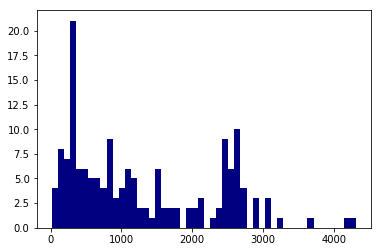

In [517]:
plt.hist(kdf_cats,bins=50,color='navy')

In [518]:
kdf_cats.head(n=10)

Web               4317
Product Design    4153
Tabletop Games    3636
Shorts            3204
Documentary       3108
Hardware          3067
Video Games       3035
Fiction           2895
Nonfiction        2883
Indie Rock        2860
Name: category_value, dtype: int64

In [522]:
'health' in list([x.lower() for x in kdf_cats.index])

False

No health category

#### Check blurbs

In [523]:
keywords = ['health','well-being','wellbeing']

In [532]:
#Nww boolean field for projects mentioning healthy stuff
kdf['healthy']= [any(x in text.lower() for x in keywords) for text in kdf.blurb]

In [540]:
kdf['healthy'].sum()

1955

1955 have the keyword

In [541]:
health_categories = pd.crosstab(kdf['category_value'],kdf['healthy']).sort_values(True,ascending=False)

health_categories[:10]

healthy,False,True
category_value,,
Restaurants,2302,143
Vegan,615,130
Food,2047,111
Drinks,2349,103
Small Batch,1945,100
Food Trucks,1858,97
Farms,1185,82
Web,4235,82
Cookbooks,560,60


Interesting mix

In [551]:
for x in health_categories.index[:15]:
    print(x)
    print('====')
    sample_obs(kdf.loc[(kdf.category_value==x) & (kdf.healthy==True)],'blurb',sample_size=2,text_length=500)
    

Restaurants
====
====
Help bring #organic#healthy#delicious#CentralAsian cuisine to our community. Serving tandoor, grill, classic Kebabs with various sides


====
Help Good Bird, purveyors of fresh, healthy chicken and salads, open up their brand-new Freret St location.


Vegan
====
====
Get Waisted was created to provide you with the power to control your health right from your very own kitchen.


====
Create and promote tasty sauces free of chemicals,and preservatives for a healthier lifestyle.


Food
====
====
Please help me build a health department-approved kitchen for on-farm cooking/cheesemaking workshops and other events!


====
Sugar-free, organic, raw, superfood chocolate. Please help me add new flavors so everyone's craving can be met: healthfully!


Drinks
====
====
Transforming apple cider vinegar into a serious daily supplement for on the go health benefits.


====
Making delicious kombucha mixed with essential oils. This makes a great smelling, healthy daily beverage. A

In [556]:
pd.crosstab(kdf['state'],kdf['healthy'])

healthy,False,True
state,,
canceled,8432,100
failed,73899,1052
live,7329,109
successful,113472,686
suspended,609,8


109 live health-related projects right now

### Where

In [559]:
pd.crosstab(kdf['country'],kdf['healthy']).sort_values(True,ascending=False)

healthy,False,True
country,,
US,160148,1441
GB,17585,213
CA,7594,105
AU,3941,53
NL,1503,22
DE,2109,20
SE,1002,13
HK,471,12
IT,1481,12


Almost exclusively developed countries

What are the healthiest cities? (in terms of kickstarter projects)

In [569]:
kdf['location'][0]

{'id': 12589342,
 'name': 'Manhattan',
 'slug': 'manhattan-ny',
 'short_name': 'Manhattan, NY',
 'displayable_name': 'Manhattan, NY',
 'localized_name': 'Manhattan',
 'country': 'US',
 'state': 'NY',
 'type': 'County',
 'is_root': False,
 'urls': {'web': {'discover': 'https://www.kickstarter.com/discover/places/manhattan-ny',
   'location': 'https://www.kickstarter.com/locations/manhattan-ny'},
  'api': {'nearby_projects': 'https://api.kickstarter.com/v1/discover?signature=1539904398.aae3553d1e62a16aac55da44ac8c71966f64bb86&woe_id=12589342'}}}

In [570]:
#Extract location value
kdf['location_value'] = [val['short_name'] if pd.isnull(val)==False else np.nan for val in kdf['location']]

In [573]:
health_cities = pd.crosstab(kdf['location_value'],kdf['healthy']).sort_values(True,ascending=False)[:30]

In [577]:
health_cities['ratio'] = health_cities.apply(lambda x: x[True]/x[False],axis=1)

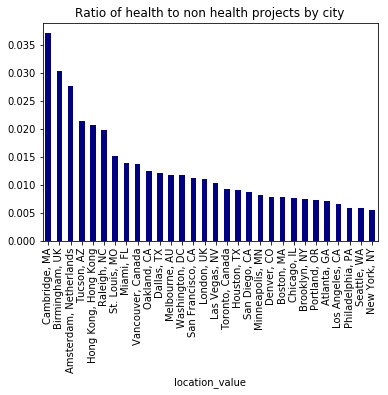

In [588]:
health_cities.sort_values('ratio',ascending=False)['ratio'].plot.bar(color='navy',title='Ratio of health to non health projects by city')

#### When?

In [596]:
# Date formats

kdf['created_year'] = [datetime.datetime.fromtimestamp(time).year for time in kdf['created_at']]

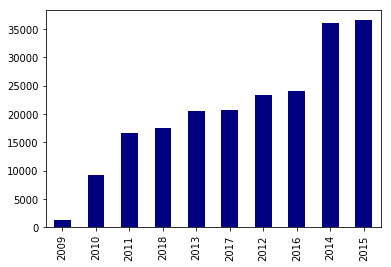

In [602]:
kdf['created_year'].value_counts().sort_values().plot.bar(color='navy')

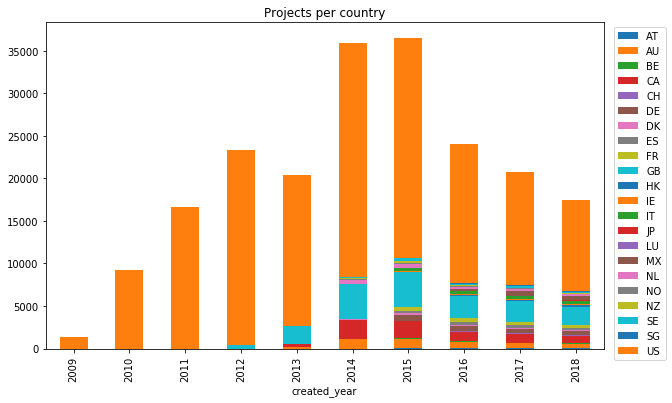

In [613]:
fig,ax = plt.subplots(figsize=(10,6))

pd.crosstab(kdf['country'],kdf['created_year']).T.plot.bar(stacked=True,ax=ax,title='Projects per country')
ax.legend(bbox_to_anchor=(1.01,1))

I hadn't realised that Kickstarter was declining! US is top orange, UK is blue, China is red) 

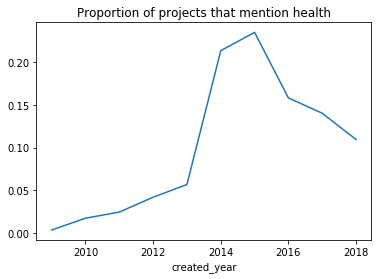

In [618]:
pd.crosstab(kdf['created_year'],kdf['healthy'],normalize=1)[True].plot(title='Proportion of projects that mention health')

We detect a decline in the proportion of projects that mention health since a peak of 2016. This could of course be driven by changes in the popularity of different categories

### Check tabletop games

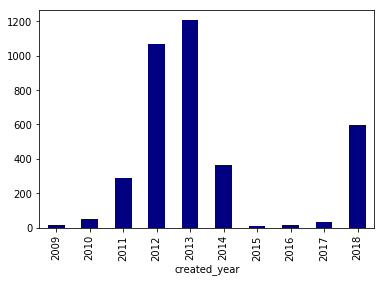

In [624]:
pd.crosstab(kdf['created_year'],kdf['category_value'])['Tabletop Games'].plot.bar(color='navy')